In [1]:
import rpy2.ipython
%load_ext rpy2.ipython
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)

In [2]:
cd 02052020_lens_diff_MeRIP_RNA-seq/radar/

/avicenna/hani/lens/02052020_lens_diff_MeRIP_RNA-seq/radar


In [3]:
%%R -o radar.1,result.1 
library("RADAR")
radar.1 <- countReads(
  samplenames = c("D0.r1","D0.r2","D25.r1","D25.r2"),
  gtf = "/avicenna/genomes/hg38/hg38_genes.gtf",
  bamFolder = "./",
  modification = "m6A",
  strandToKeep = "opposite",
  outputDir = "D25vD0",
  threads = 16
)
radar.1 <- normalizeLibrary(radar.1)
radar.1 <- adjustExprLevel(radar.1)
variable(radar.1) <- data.frame( Group = c(rep("D0",2),rep("D25",2)) )
radar.1 <- filterBins(radar.1,minCountsCutOff = 15)
radar.1 <- diffIP_parallel(radar.1, thread = 8)
top_bins <- extractIP(radar.1,filtered = T)[order(rowMeans( extractIP(radar.1,filtered = T) ),decreasing = T)[1:1000],]
radar.1 <- reportResult(radar.1, cutoff = 0.1, Beta_cutoff = 0.5, threads=16)
result.1 <- results(radar.1)
saveRDS(radar.1, file = "radar1.D25vD0.rds")

Reading gtf file to obtain gene model
Filter out ambiguous model...
Gene model obtained from gtf file...
counting reads for each genes, this step may takes a few hours....
Hyper-thread registered: TRUE 
Using 16 thread(s) to count reads in continuous bins...
Time used to count reads: 17.6648454030355 mins... 
Adjusting expression level using Input geneSum read count...
Filtering bins with low read counts...
Bins with average counts lower than  15  in both groups have been removed...
Filtering bins that is enriched in IP experiment...The predictor variable has been converted:
 D0  D0 D25 D25 
  0   0   1   1 
running PoissonGamma test at single beta mode
Hyper-thread registered: TRUE 
Using 8 thread(s) to run PoissonGamma test...
Time used to run PoissonGamma test: 1.13678090572357 mins... 

Returning normalized IP read counts.
Returning normalized IP read counts.
Hyper-thread registered: TRUE 
Using 16 thread(s) to report merged report...
Time used to report peaks: 1.2716024239858 mins

In [9]:
%%R -o radar.1
radar.1 <- readRDS("radar1.D25vD0.rds")

There are 12554 reported differential loci at FDR < 0.1 and logFoldChange > 0.5.
There are 12554 reported differential loci at FDR < 0.1 and logFoldChange > 0.5.


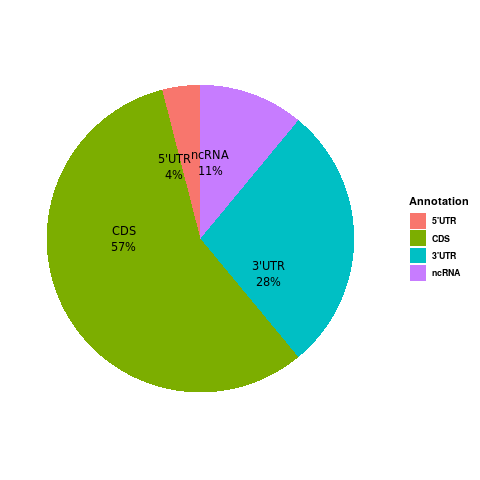

In [12]:
%%R -i radar.1
result.1 <- results(radar.1)
peakDistribution(radar.1)

In [10]:
%%R -i radar.1
library(tidyverse)
result.1 <- results(radar.1)
result.1 <- as_tibble(result.1) %>% mutate(name = sprintf("%s_%s:%d:%d", name, chr, start, end))
write_tsv(result.1, "radar1.D25vD0.bed", col_names=F)
result.1

There are 12554 reported differential loci at FDR < 0.1 and logFoldChange > 0.5.
# A tibble: 12,554 x 14
   chr    start    end name  score strand thickStart thickEnd itemRgb blockCount
   <fct>  <dbl>  <dbl> <chr> <dbl> <fct>       <dbl>    <dbl>   <dbl>      <int>
 1 chr19 5.84e7 5.84e7 A1BG…     0 +        58352614 58352663       0          1
 2 chr19 5.84e7 5.84e7 A1BG…     0 +        58354490 58354539       0          1
 3 chr19 5.84e7 5.84e7 A1BG…     0 +        58354738 58354787       0          1
 4 chr22 4.27e7 4.27e7 A4GA…     0 -        42692221 42692270       0          1
 5 chr22 4.27e7 4.27e7 A4GA…     0 -        42692669 42692718       0          1
 6 chr22 4.27e7 4.27e7 A4GA…     0 -        42693117 42693166       0          1
 7 chr22 4.27e7 4.27e7 A4GA…     0 -        42693466 42693515       0          1
 8 chr2  6.95e7 6.95e7 AAK1…     0 -        69465682 69465731       0          1
 9 chr2  6.95e7 6.95e7 AAK1…     0 -        69466431 69466480       0          1
10 c

In [41]:
%%R
library(Guitar)
stBedFiles <- list(system.file("extdata", "m6A_mm10_exomePeak_1000peaks_bed12.bed",package="Guitar"))
txdb_file <- system.file("extdata", "mm10_toy.sqlite",package="Guitar")
txdb <- loadDb(txdb_file)
GuitarPlot(txTxdb = txdb,stBedFiles = stBedFiles,miscOutFilePrefix = "example")
#txdb <- makeTxDbFromGFF(file='/avicenna/genomes/hg38/hg38_genes.gtf')
#guitarTxdb <- makeGuitarTxdb(txdb = txdb, txPrimaryOnly = FALSE)
#GuitarPlot(txTxdb = txdb, stBedFiles = list("radar1.D25vD0.bed"), miscOutFilePrefix = NA)


Error in GuitarPlot(txTxdb = txdb, stBedFiles = stBedFiles, miscOutFilePrefix = "example") : 
  unused arguments (txTxdb = txdb, stBedFiles = stBedFiles, miscOutFilePrefix = "example")


In [3]:
%%R -o radar.2,result.2 
library(RADAR)
radar.2 <- countReads(
  samplenames = c("D0.r1","D0.r2","D70.r1","D70.r2"),
  gtf = "/avicenna/genomes/hg38/hg38_genes.gtf",
  bamFolder = "./",
  modification = "m6A",
  strandToKeep = "opposite",
  outputDir = "D70vD0",
  threads = 16
)
radar.2 <- normalizeLibrary(radar.2)
radar.2 <- adjustExprLevel(radar.2)
variable(radar.2) <- data.frame( Group = c(rep("D0",2),rep("D70",2)) )
radar.2 <- filterBins(radar.2,minCountsCutOff = 15)
radar.2 <- diffIP_parallel(radar.2, thread = 8)
top_bins <- extractIP(radar.2,filtered = T)[order(rowMeans( extractIP(radar.2,filtered = T) ),decreasing = T)[1:1000],]
radar.2 <- reportResult(radar.2, cutoff = 0.1, Beta_cutoff = 0.5, threads=16)
result.2 <- results(radar.2)
saveRDS(radar.2, file = "radar2.D70vD0.rds")
library(tidyverse)
result.2 <- as_tibble(result.2) %>% mutate(name = sprintf("%s_%s:%d:%d", name, chr, start, end))
write_tsv(result.2, "radar2.D70vD0.bed", col_names=F)
result.2

Reading gtf file to obtain gene model
Filter out ambiguous model...
Gene model obtained from gtf file...
counting reads for each genes, this step may takes a few hours....
Hyper-thread registered: TRUE 
Using 16 thread(s) to count reads in continuous bins...
Time used to count reads: 18.1810572862625 mins... 
Adjusting expression level using Input geneSum read count...
Filtering bins with low read counts...
Bins with average counts lower than  15  in both groups have been removed...
Filtering bins that is enriched in IP experiment...The predictor variable has been converted:
 D0  D0 D70 D70 
  0   0   1   1 
running PoissonGamma test at single beta mode
Hyper-thread registered: TRUE 
Using 8 thread(s) to run PoissonGamma test...
Time used to run PoissonGamma test: 1.28036247094472 mins... 

Returning normalized IP read counts.
Returning normalized IP read counts.
Hyper-thread registered: TRUE 
Using 16 thread(s) to report merged report...
Time used to report peaks: 1.69155034224192 min

In [5]:
%%R -o radar.2
radar.2 <- readRDS("radar2.D70vD0.rds")

In [11]:
%%R -i radar.2
library(tidyverse)
result.2 <- results(radar.2)
result.2 <- as_tibble(result.2) %>% mutate(name = sprintf("%s_%s:%d:%d", name, chr, start, end))
write_tsv(result.2, "radar2.D70vD0.bed", col_names=F)
result.2

There are 15555 reported differential loci at FDR < 0.2 and logFoldChange > 0.5.
# A tibble: 15,555 x 14
   chr    start    end name  score strand thickStart thickEnd itemRgb blockCount
   <fct>  <dbl>  <dbl> <chr> <dbl> <fct>       <dbl>    <dbl>   <dbl>      <int>
 1 chr19 5.84e7 5.84e7 A1BG…     0 +        58354490 58354539       0          1
 2 chr19 5.84e7 5.84e7 A1BG…     0 +        58354738 58354787       0          1
 3 chr22 4.27e7 4.27e7 A4GA…     0 -        42692569 42692618       0          1
 4 chr22 4.27e7 4.27e7 A4GA…     0 -        42692669 42692718       0          1
 5 chr22 4.27e7 4.27e7 A4GA…     0 -        42693117 42693166       0          1
 6 chr2  6.95e7 6.95e7 AAK1…     0 -        69465183 69465232       0          1
 7 chr20 3.62e7 3.62e7 AAR2…     0 +        36240047 36240096       0          1
 8 chr20 3.62e7 3.62e7 AAR2…     0 +        36240245 36240294       0          1
 9 chr20 3.62e7 3.62e7 AAR2…     0 +        36240344 36240393       0          1
10 c

In [12]:
%%R -o radar.3,result.3 
library(RADAR)
radar.3 <- countReads(
  samplenames = c("D25.r1","D25.r2","D70.r1","D70.r2"),
  gtf = "/avicenna/genomes/hg38/hg38_genes.gtf",
  bamFolder = "./",
  modification = "m6A",
  strandToKeep = "opposite",
  outputDir = "D70vD25",
  threads = 16
)
radar.3 <- normalizeLibrary(radar.3)
radar.3 <- adjustExprLevel(radar.3)
variable(radar.3) <- data.frame( Group = c(rep("D25",2),rep("D70",2)) )
radar.3 <- filterBins(radar.3,minCountsCutOff = 15)
radar.3 <- diffIP_parallel(radar.3, thread = 8)
top_bins <- extractIP(radar.3,filtered = T)[order(rowMeans( extractIP(radar.3,filtered = T) ),decreasing = T)[1:1000],]
radar.3 <- reportResult(radar.3, cutoff = 0.1, Beta_cutoff = 0.5, threads=16)
result.3 <- results(radar.3)
saveRDS(radar.3, file = "radar3.D70vD25.rds")
library(tidyverse)
result.3 <- as_tibble(result.3) %>% mutate(name = sprintf("%s_%s:%d:%d", name, chr, start, end))
write_tsv(result.3, "radar3.D70vD25.bed", col_names=F)
result.3

Reading gtf file to obtain gene model
Filter out ambiguous model...
Gene model obtained from gtf file...
counting reads for each genes, this step may takes a few hours....
Hyper-thread registered: TRUE 
Using 16 thread(s) to count reads in continuous bins...
Error in { : 
  task 1 failed - "GRanges objects don't support [[, as.list(), lapply(), or unlist() at
  the moment"


In [14]:
%%R
library(Guitar)
txdb <- makeTxDbFromGFF('/avicenna/genomes/hg38/hg38_genes.gtf"')
GuitarPlot(txTxdb = txdb,stBedFiles = list("radar1.D25vD0.bed","radar2.D70vD0.bed","radar3.D70vD25.bed"),miscOutFilePrefix = "radar")


'/avicenna/hani/lens/02052020_lens_diff_MeRIP_RNA-seq/radar'

In [15]:
%%R
radar.2 <- readRDS("radar2.D70vD0.rds")
pdf('D70vD0_heatmap.pdf')
plotHeatMap(radar.2)
dev.off()

Plot heat map for differential loci at FDR < 0.1 and logFoldChange > 0.5.
Returning normalized and expression level adjusted IP read counts.
png 
  2 


Hyper-thread registered: TRUE 
Using 16 thread(s) to report merged report...
Time used to report peaks: 9.13038447300593 mins... 
When merging neighboring significant bins, logFC was reported as the max logFC among these bins.
p-value of these bins were combined by Fisher's method.
There are 65295 reported differential loci at FDR < 1.1 and logFoldChange > 0.


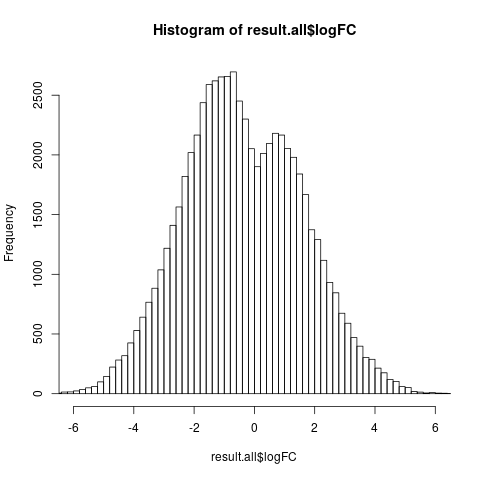

In [3]:
%%R -o result.all
library(RADAR)
radar.2 <- readRDS("radar2.D70vD0.rds")
radar.2 <- reportResult(radar.2, cutoff = 1.1, Beta_cutoff = 0.00, threads=16)
result.all <- results(radar.2)
library(tidyverse)
result.all <- as_tibble(result.all) %>% mutate(name = sprintf("%s_%s:%d:%d", name, chr, start, end))
write_tsv(result.all, "radar2.D70vD0.FDR1.1.logFC0.00.all.bed", col_names=F)
hist(result.all$logFC, breaks=200, xlim=c(-6,6))

Hyper-thread registered: TRUE 
Using 16 thread(s) to report merged report...
Time used to report peaks: 0.994796061515808 mins... 
When merging neighboring significant bins, logFC was reported as the max logFC among these bins.
p-value of these bins were combined by Fisher's method.
There are 9138 reported differential loci at FDR < 0.25 and logFoldChange > 2.


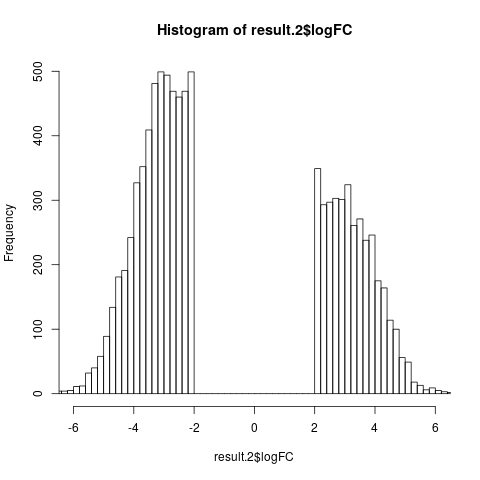

In [3]:
%%R -o result.2
library(RADAR)
radar.2 <- readRDS("radar2.D70vD0.rds")
radar.2 <- reportResult(radar.2, cutoff = 0.25, Beta_cutoff = 2, threads=16)
result.2 <- results(radar.2)
library(tidyverse)
result.2 <- as_tibble(result.2) %>% mutate(name = sprintf("%s_%s:%d:%d", name, chr, start, end))
result.2 <- result.2 %>% distinct(name, .keep_all = TRUE)
write_tsv(result.2, "radar2.D70vD0.FDR25.logFC2.sig.bed", col_names=F)
hist(result.2$logFC, breaks=200, xlim=c(-6,6))

In [5]:
%%R -i result.2
write_tsv(result.2, "radar2.D70vD0.FDR25.logFC2.sig.bed", col_names=F)
pdf("radar2.D70vD0.FDR25.logFC2.sig.hist.pdf")
hist(result.2$logFC, breaks=200, xlim=c(-6,6))
dev.off()

png 
  2 


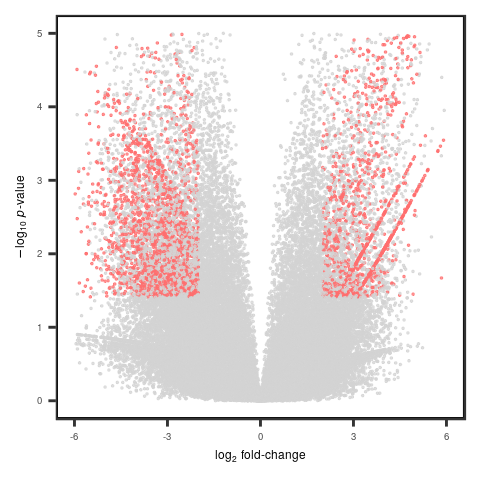

In [31]:
%%R -i result.all
result.2 <- read_tsv("radar2.D70vD0.FDR25.logFC2.sig.bed", col_names=F, col_types=list(col_character(), col_integer(), col_integer(), col_character(), col_integer(), col_character(), col_integer(), col_integer(), col_integer(), col_integer(), col_integer(), col_character(), col_double(), col_double()))
colnames(result.2) <- colnames(result.all)
result.all <- result.all %>% mutate(sig = factor(ifelse(name %in% result.2$name, 1, 0), levels=c(1,0)))
result.all %>% ggplot(aes(x=logFC, y=-log10(p_value), colour=sig), alpha=0.75, size=1) +
  xlim(c(-6, 6)) + ylim(c(0, 5.0)) +
  xlab(expression(log[2]~'fold-change')) + ylab(expression(-log[10]~paste(italic('p'),'-value')))+ 
  geom_point(alpha=0.75, size=1) +
  #scale_y_log10()+
  scale_colour_manual(values=c("#FF6E6E","#D3D3D3"))+theme_bw(30) +
  theme(panel.background = element_rect(colour = "black",size=2), panel.grid.major = element_blank(),panel.grid.minor = element_blank()) +
  theme(legend.position="none") +
  theme(text = element_text(size=12))


In [4]:
%%R -o radar.2
library(RADAR)
radar.2 <- readRDS("radar2.D70vD0.rds")
radar.2 <- reportResult(radar.2, cutoff = 0.25, Beta_cutoff = 2, threads=16)

Hyper-thread registered: TRUE 
Using 16 thread(s) to report merged report...
Time used to report peaks: 0.906593286991119 mins... 
When merging neighboring significant bins, logFC was reported as the max logFC among these bins.
p-value of these bins were combined by Fisher's method.


In [5]:
%%R -i radar.2
pdf('radar2.D70vD0.sig.heatmap.pdf')
plotHeatMap(radar.2)
dev.off()

Plot heat map for differential loci at FDR < 0.25 and logFoldChange > 2.
Returning normalized and expression level adjusted IP read counts.
png 
  2 


In [31]:
%%R
library(tidyverse)
result.2 <- read_tsv("radar2.D70vD0.FDR25.logFC2.sig.bed", col_names=F, col_types=list(col_character(), col_integer(), col_integer(), col_character(), col_integer(), col_character(), col_integer(), col_integer(), col_integer(), col_integer(), col_character(), col_character(), col_double(), col_double()))
#colnames(result.2) <- colnames(result.all)
result.2 <- result.2 %>% filter(X3-X2<200) %>% distinct(X1,X2,X3, .keep_all = TRUE)
write_tsv(result.2, "radar2.D70vD0.FDR25.logFC2.sig.c.bed", col_names=F)

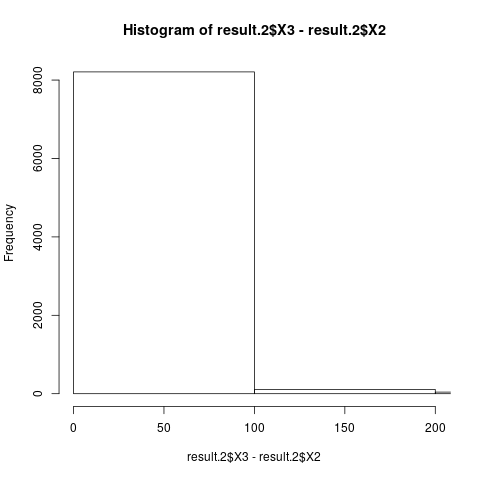

In [32]:
%%R
library(tidyverse)
result.2 <- read_tsv("radar2.D70vD0.FDR25.logFC2.sig.bed", col_names=F, col_types=list(col_character(), col_integer(), col_integer(), col_character(), col_integer(), col_character(), col_integer(), col_integer(), col_integer(), col_integer(), col_integer(), col_character(), col_double(), col_double()))
hist(result.2$X3-result.2$X2, xlim=c(0,200), breaks=2000)

In [33]:
%%bash
bedtools getfasta -s -fi /avicenna/genomes/hg38/hg38.fa -bed radar2.D70vD0.FDR25.logFC2.sig.c.bed -split -fo radar2.D70vD0.FDR25.logFC2.sig.fa


In [34]:
%%bash
head radar2.D70vD0.FDR25.logFC2.sig.fa

>chr19:58354490-58354539(+)
gagcagaggagaccaggagttgaggcgactgcagagcgattgcagagct
>chr19:58354738-58354787(+)
GCAGAAGAGACAACCAGGTGCTGAGGCCTGAAGTCATAACCAGACCTGG
>chr22:42693067-42693116(-)
TGCCCCCTGAGGCCTTCTACCCCATCCCCTGGCAGGACTGGAAGAAGTA
>chr2:69458245-69458294(-)
CTCTGCTGACTATTTGGAATGGACTGAATGAGGAGGTCTCTCCAGCCAG
>chr2:69465283-69465332(-)
ATCAGTTCTTATATTTCAATTCCCTGCGTCAGAGCAGAATTTCTTGAGT


In [35]:
%%bash
perl /avicenna/bins/TEISERv1.1/prep_seqs_for_teiser_run.pl radar2.D70vD0.FDR25.logFC2.sig.fa radar2.D70vD0.FDR25.logFC2.sig

In [36]:
pwd

'/avicenna/hani/lens/02052020_lens_diff_MeRIP_RNA-seq/radar'

In [39]:
%%bash
$FIREDIR/fire.pl --expfile=radar2.D70vD0.FDR25.logFC2.sig_teiser.txt --species=human --exptype=discrete --nodups=1 --oribiasonly=0 --fastafile_rna=radar2.D70vD0.FDR25.logFC2.sig_teiser.fa --dodna=0 --dodnarna=0 --doskipdiscovery=1 --motiffile_rna=RGAC.txt

Fri Feb  7 20:15:15 PST 2020
RNA, Processing radar2.D70vD0.FDR25.logFC2.sig_teiser.txt_FIRE/RNA/radar2.D70vD0.FDR25.logFC2.sig_teiser.txt
RNA, Step 2: skip seed optimization, use -motiffile_rna option instead.
RNA, Step 3: evaluation of motif significances.
Processing motif [AG]GAC.
MI=0.00427914
Shuffle rank=0
Z-score=66.511
Sigificance category= OK-NO-SEED
Robustness (jn_f=3)=10/10

Processing motif [AGT][AG]AC[ACT].
MI=0.00550673
Shuffle rank=0
Z-score=89.063
Sigificance category= OK-NO-SEED
Robustness (jn_f=3)=10/10

RNA, Step 3.5: creating binary expression profiles.
RNA, Step 4: discovery of distance constraints.
Read 2 motifs.
Read 16586 (genes) x 2 (conditions) matrix.
Read 16586 (genes) x 1 (conditions) matrix.
Reading sequences and building motif profiles ...Done.
Average sequence length is 52.
Quantized E vector into 2 bins
Motif [AG]GAC, present in 5981 genes.
       Average distance: MI=0.0005, rank=4056/10000, Z=-0.0019, mbins=5
  Orientation bias {5'): MI=0.0043, rank=0/

corrupted size vs. prev_size
Aborted
corrupted size vs. prev_size
Aborted
Segmentation fault
corrupted size vs. prev_size
Aborted
Parameter to use lib must be directory, not file at /nvme/bins/FIRE-1.1/SCRIPTS/GroupEnrichment.pm line 3.
Parameter to use lib must be directory, not file at /nvme/bins/FIRE-1.1/SCRIPTS/GroupEnrichment.pm line 3.
Can't use 'defined(@array)' (Maybe you should just omit the defined()?) at /nvme/bins/FIRE-1.1/SCRIPTS/draw_position_histogram.pl line 134.
Parameter to use lib must be directory, not file at /nvme/bins/FIRE-1.1/SCRIPTS/GroupEnrichment.pm line 3.
Parameter to use lib must be directory, not file at /nvme/bins/FIRE-1.1/SCRIPTS/GroupEnrichment.pm line 3.
Can't locate Hypergeom.pm in @INC (you may need to install the Hypergeom module) (@INC contains: /nvme/bins/FIRE-1.1/SCRIPTS/../modules/lib/perl5/site_perl/5.12.4/darwin-thread-multi-2level/nvme/bins/FIRE-1.1/SCRIPTS/../modules/lib/perl5/site_perl/5.10.0/darwin-thread-multi-2level/Hypergeom.pm /nvme/b

In [67]:
%%bash
#extract genes that are hypomethylated
awk '{if($13<0) print}' radar2.D70vD0.FDR25.logFC2.sig.bed | cut -f4 | sed 's/_.*//g' | sort -u > radar2.D70vD0.FDR25.logFC2.sig.hypo.gene.list
awk '{if($13>0) print}' radar2.D70vD0.FDR25.logFC2.sig.bed | cut -f4 | sed 's/_.*//g' | sort -u > radar2.D70vD0.FDR25.logFC2.sig.hyper.gene.list

In [68]:
%%R
library("org.Hs.eg.db") # remember to install it if you don't have it already
genes <- scan('radar2.D70vD0.FDR25.logFC2.sig.hypo.gene.list', what=character())
ensemblsIDS <- mapIds(org.Hs.eg.db, keys = genes, keytype = "SYMBOL", column="ENSEMBL")
write.table(ensemblsIDS, 'radar2.D70vD0.FDR25.logFC2.sig.hypo.ens.list', quote = F, row.names=F, col.names = F)

genes <- scan('radar2.D70vD0.FDR25.logFC2.sig.hyper.gene.list', what=character())
ensemblsIDS <- mapIds(org.Hs.eg.db, keys = genes, keytype = "SYMBOL", column="ENSEMBL")
write.table(ensemblsIDS, 'radar2.D70vD0.FDR25.logFC2.sig.hyper.ens.list', quote = F, row.names=F, col.names = F)

In [63]:
%%bash
head radar2.D70vD0.FDR25.logFC2.sig.hypo.ens.list

ENSG00000268895
ENSG00000128274
ENSG00000115977
ENSG00000131043
ENSG00000090861
ENSG00000124608
ENSG00000157426
ENSG00000181409
ENSG00000183044
ENSG00000165029


In [71]:
%%bash
perl /avicenna/bins/TEISERv1.1/run_mi_gene_list.pl --expfile=../RNA-seq_pipeline/stbl/differential_analysis_summary_D70vsD0.txt \
--genefile=radar2.D70vD0.FDR25.logFC2.sig.hypo.ens.list --exptype=continuous --ebins=9 --species=human_cds  --doremovedups=0 --doremoveextra=0
mv ../RNA-seq_pipeline/stbl/differential_analysis_summary_D70vsD0.txt_GENESET ../RNA-seq_pipeline/stbl/differential_analysis_summary_D70vsD0.txt_hypo-methylated_GENESET


The TEISERDIR environment variable is /avicenna/bins/TEISERv1.1
Sat Feb  8 08:47:47 PST 2020
Remove duplicates, create ../RNA-seq_pipeline/stbl/differential_analysis_summary_D70vsD0.txt_GENESET/differential_analysis_summary_D70vsD0.txt
Quantizing the input file.
step 2: seed optimization.
Expfile loaded: 5317 values...
Adding small values...
Quantizing the input vector...Done
Number of clusters: 9
calculating the p-value matrix.
Allocating memory ... Done
doing stats: mi = 0.002001
pass = 0.062700
z = 1.654949
freq 0: 0.307953	182	591	1396	5317
freq 1: 0.258883	153	591	1396	5317
freq 2: 0.280880	166	591	1396	5317
freq 3: 0.265651	157	591	1396	5317
freq 4: 0.272420	161	591	1396	5317
freq 5: 0.257191	152	591	1396	5317
freq 6: 0.255499	151	591	1396	5317
freq 7: 0.218274	129	591	1396	5317
freq 8: 0.246180	145	589	1396	5317
step 7: drawing matrix.
Reading MI data ... Done.
Start drawing
4.44	-2.22
0
Outputing EPS file ../RNA-seq_pipeline/stbl/differential_analysis_summary_D70vsD0.txt_GENESE

Option suffix requires an argument


In [74]:
%%bash
perl /avicenna/bins/TEISERv1.1/run_mi_gene_list.pl --expfile=../RNA-seq_pipeline/stbl/differential_analysis_summary_D70vsD0.txt \
--genefile=radar2.D70vD0.FDR25.logFC2.sig.hyper.ens.list --exptype=continuous --ebins=9 --species=human_cds  --doremovedups=0 --doremoveextra=0
mv ../RNA-seq_pipeline/stbl/differential_analysis_summary_D70vsD0.txt_GENESET ../RNA-seq_pipeline/stbl/differential_analysis_summary_D70vsD0.txt_hyper-methylated_GENESET

The TEISERDIR environment variable is /avicenna/bins/TEISERv1.1
Sat Feb  8 08:50:03 PST 2020
Remove duplicates, create ../RNA-seq_pipeline/stbl/differential_analysis_summary_D70vsD0.txt_GENESET/differential_analysis_summary_D70vsD0.txt
Quantizing the input file.
step 2: seed optimization.
Expfile loaded: 5317 values...
Adding small values...
Quantizing the input vector...Done
Number of clusters: 9
calculating the p-value matrix.
Allocating memory ... Done
doing stats: mi = 0.005975
pass = 0.000000
z = 9.018099
freq 0: 0.248731	147	591	1000	5317
freq 1: 0.191201	113	591	1000	5317
freq 2: 0.192893	114	591	1000	5317
freq 3: 0.213198	126	591	1000	5317
freq 4: 0.191201	113	591	1000	5317
freq 5: 0.175973	104	591	1000	5317
freq 6: 0.196277	116	591	1000	5317
freq 7: 0.172589	102	591	1000	5317
freq 8: 0.110357	65	589	1000	5317
step 7: drawing matrix.
Reading MI data ... Done.
Start drawing
4.44	-2.22
0
Outputing EPS file ../RNA-seq_pipeline/stbl/differential_analysis_summary_D70vsD0.txt_GENESET

Option suffix requires an argument
rm: cannot remove '../RNA-seq_pipeline/stbl/differential_analysis_summary_D70vsD0.txt_hyper-methylated_GENESET': Is a directory


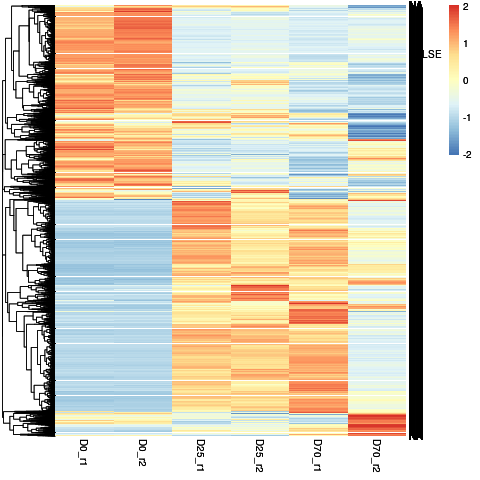

In [153]:
%%R
library(tidyverse)
library(pheatmap)
exp <- read_tsv('../RNA-seq_pipeline/exp/featureCounts_pcg_rpm_exp.txt')
colnames(exp) <- c("Gene", "D70_r1", "D0_r1", "D25_r2", "D0_r2", "D25_r1", "D70_r2")
exp <- exp %>% select(Gene, D0_r1, D0_r2, D25_r1, D25_r2, D70_r1, D70_r2)
cond <- c("D0","D0","D25", "D25", "D70", "D70")
genes <- c()
D70v25 <- read_tsv('../RNA-seq_pipeline/exp/differential_analysis_summary_D70vsD25.txt')
genes <- c(genes, D70v25 %>% filter(Significant=="Yes") %>% pull(Gene_ID))
D70v0 <- read_tsv('../RNA-seq_pipeline/exp/differential_analysis_summary_D70vsD0.txt')
genes <- c(genes, D70v0 %>% filter(Significant=="Yes") %>% pull(Gene_ID))
D25v0 <- read_tsv('../RNA-seq_pipeline/exp/differential_analysis_summary_D25vsD0.txt')
genes <- c(genes, D25v0 %>% filter(Significant=="Yes") %>% pull(Gene_ID))

exp <- exp %>% filter(Gene %in% genes)
p <- pheatmap(exp[,-1], scale="row", cluster_cols=F,labels_row=F)
#pdf("../RNA-seq_pipeline/exp/featureCounts_pcg_rpm_exp.heatmap.pdf", width=2, height=3)
#grid::grid.newpage()
#grid::grid.draw(p$gtable)
#dev.off()
p

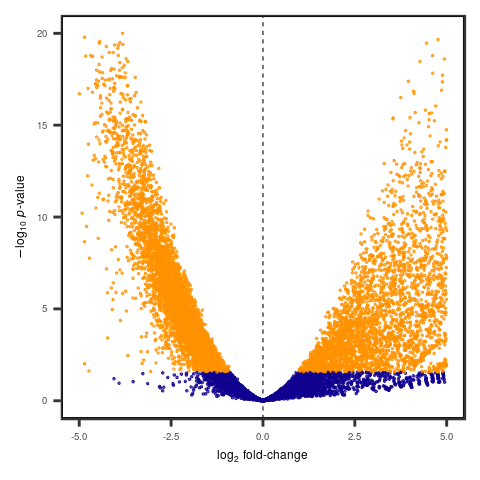

In [120]:
%%R
library(tidyverse)
exp <- read_tsv('../RNA-seq_pipeline/exp/differential_analysis_summary_D70vsD0.txt')
exp %>% ggplot(aes(x=diff, y=-log10(pvalue), colour=Significant), alpha=0.75, size=1) +
  geom_vline(aes(xintercept=0), colour="black",linetype="dashed", size=0.5)+
  xlim(c(-5, 5)) + ylim(c(0, 20.0)) +
  xlab(expression(log[2]~'fold-change')) + ylab(expression(-log[10]~paste(italic('p'),'-value')))+ 
  geom_point(alpha=0.75, size=1) +
  #scale_y_log10()+
  scale_colour_manual(values=c("#11008f", "#FF9100", "FF0000"))+theme_bw(30) +
  theme(panel.background = element_rect(colour = "black",size=2), panel.grid.major = element_blank(),panel.grid.minor = element_blank()) +
  theme(legend.position="none") +
  theme(text = element_text(size=12))



In [116]:
%%R
library(tidyverse)
stbl <- read_tsv('../RNA-seq_pipeline/stbl/differential_analysis_summary_D70vsD0.txt')
hypo <- scan('radar2.D70vD0.FDR25.logFC2.sig.hypo.ens.list', what=character())
hyper <- scan('radar2.D70vD0.FDR25.logFC2.sig.hyper.ens.list', what=character())
stbl <- stbl %>% filter(pvalue<0.25) %>% filter(GeneID %in% hypo | GeneID %in% hyper) %>% mutate(m6A = factor(ifelse(GeneID %in% hypo, "hypo", "hyper")))
stbl %>% ggplot(aes(x=diff, color=m6A, fill=m6A)) + stat_ecdf() +
xlab("D70 vs D0 mRNA stability") + ylab("Frequency")+ 
  scale_colour_manual(values=c("hypo"="#AB71FF", "hyper"="#FFBE71"))+
  theme_bw(11) + theme(panel.background = element_rect(colour = "black")) + theme(panel.background = element_rect(colour = "black"), panel.grid.minor = element_blank(), legend.position=c(0.2,0.8))
#ggsave('../RNA-seq_pipeline/stbl/differential_analysis_summary_D70vsD0.m6A.hypo_vs_hyper.p0.01.pdf', width=2.5, heigh=2.5)
ks.test(stbl %>% filter(m6A=="hypo") %>% select(diff) %>% pull(), stbl %>% filter(m6A=="hyper") %>% select(diff) %>% pull())
#stbl



	Two-sample Kolmogorov-Smirnov test

data:  stbl %>% filter(m6A == "hypo") %>% select(diff) %>% pull() and stbl %>% filter(m6A == "hyper") %>% select(diff) %>% pull()
D = 0.16028, p-value = 0.0154
alternative hypothesis: two-sided



In [178]:
%%R
library(tidyverse)
stbl <- read_tsv('../RNA-seq_pipeline/stbl/differential_analysis_summary_D70vsD25.txt')
hypo <- scan('radar2.D70vD0.FDR25.logFC2.sig.hypo.ens.list', what=character())
hyper <- scan('radar2.D70vD0.FDR25.logFC2.sig.hyper.ens.list', what=character())
stbl <- stbl %>% filter(pvalue<0.25) %>% filter(GeneID %in% hypo | GeneID %in% hyper) %>% mutate(m6A = factor(ifelse(GeneID %in% hypo, "hypo", "hyper")))
stbl %>% ggplot(aes(x=m6A, y=diff, color=m6A, fill=m6A)) + geom_boxplot(alpha=0.5, width=0.5) +
xlab("Methyltion status") + ylab("D70 vs D0 mRNA stability")+ 
  scale_colour_manual(values=c("hypo"="#AB71FF", "hyper"="#FFBE71"))+
  scale_fill_manual(values=c("hypo"="#AB71FF", "hyper"="#FFBE71"))+
  theme_bw(11) + theme(panel.background = element_rect(colour = "black")) + theme(panel.background = element_rect(colour = "black"), panel.grid.minor = element_blank(), legend.position="none")
ggsave('../RNA-seq_pipeline/stbl/differential_analysis_summary_D70vsD25.m6A.hypo_vs_hyper.p0.01.pdf', width=2.5, heigh=2.5)
#wilcox.test(stbl %>% filter(m6A=="hypo") %>% select(diff) %>% pull(), stbl %>% filter(m6A=="hyper") %>% select(diff) %>% pull())
#stbl

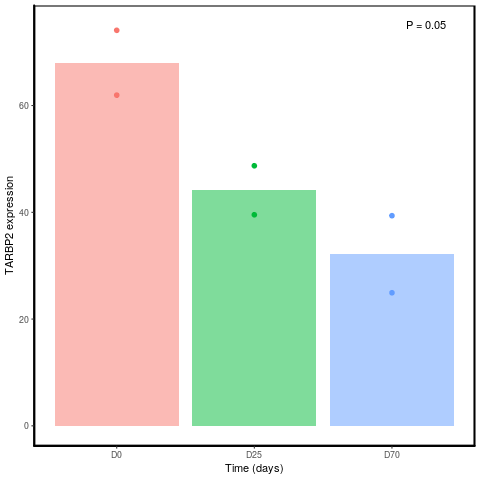

In [246]:
%%R
library(tidyverse)
exp <- read_tsv('../RNA-seq_pipeline/exp/featureCounts_pcg_rpm_exp.txt')
colnames(exp) <- c("Ensemble", "D70_r1", "D0_r1", "D25_r2", "D0_r2", "D25_r1", "D70_r2")
exp <- exp %>% select(Ensemble, D0_r1, D0_r2, D25_r1, D25_r2, D70_r1, D70_r2)
cond <- c("D0","D0","D25", "D25", "D70", "D70")
exp <- exp %>% mutate(Gene = mapIds(org.Hs.eg.db, keys = Ensemble, keytype = "ENSEMBL", column="SYMBOL"))
tarbp2 <- exp %>% filter(Gene=="TARBP2") %>% select(c(-1,-8))
tarbp2 <- data.frame(TARBP2=t(tarbp2), cond = cond)
gd <- tarbp2 %>% group_by(cond) %>% summarise_all(mean)
pv <- sprintf("P = %.2f", summary(aov(tarbp2$TARBP2~tarbp2$cond))[[1]][["Pr(>F)"]][[1]])
tarbp2 %>% ggplot(aes(x=cond, y=TARBP2, color=cond, fill=cond)) + geom_bar(data = gd, stat = "identity", alpha=0.5, color=NA)+ geom_point(size=2) +
  annotate("text", x=3.25,y=75, label=pv)+xlab("Time (days)")+ylab("TARBP2 expression")+
  theme_bw(11) + theme(panel.background = element_rect(colour = "black")) + theme(panel.background = element_rect(size = 1, linetype = "solid", colour = "black"), panel.grid.minor = element_blank(), panel.grid.major = element_blank(), legend.position="none", panel.border = element_blank(),
                                                                                 axis.line.x = element_line(size = 1, linetype = "solid", colour = "black"),
                                                                                axis.line.y = element_line(size = 1, linetype = "solid", colour = "black"))
#ggsave('../RNA-seq_pipeline/exp/featureCounts_pcg_rpm_exp_TARBP2.pdf', width=1.75, heigh=2.5)

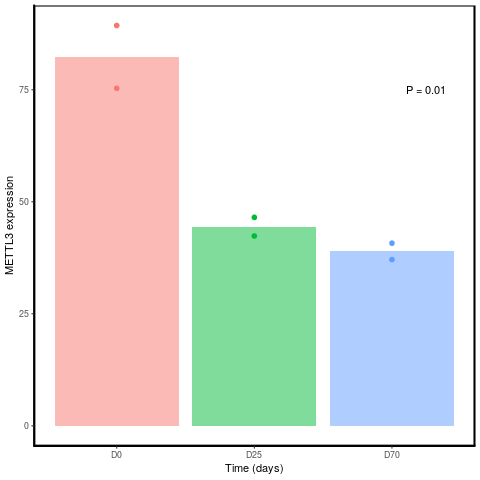

In [245]:
%%R
library(tidyverse)
exp <- read_tsv('../RNA-seq_pipeline/exp/featureCounts_pcg_rpm_exp.txt')
colnames(exp) <- c("Ensemble", "D70_r1", "D0_r1", "D25_r2", "D0_r2", "D25_r1", "D70_r2")
exp <- exp %>% select(Ensemble, D0_r1, D0_r2, D25_r1, D25_r2, D70_r1, D70_r2)
cond <- c("D0","D0","D25", "D25", "D70", "D70")
exp <- exp %>% mutate(Gene = mapIds(org.Hs.eg.db, keys = Ensemble, keytype = "ENSEMBL", column="SYMBOL"))
mettl3 <- exp %>% filter(Gene=="METTL3") %>% select(c(-1,-8))
mettl3 <- data.frame(METTL3=t(mettl3), cond = cond)
gd <- mettl3 %>% group_by(cond) %>% summarise_all(mean)
pv <- sprintf("P = %.2f", summary(aov(mettl3$METTL3~mettl3$cond))[[1]][["Pr(>F)"]][[1]])
mettl3 %>% ggplot(aes(x=cond, y=METTL3, color=cond, fill=cond)) + geom_bar(data = gd, stat = "identity", alpha=0.5, color=NA)+ geom_point(size=2) +
  annotate("text", x=3.25,y=75, label=pv)+xlab("Time (days)")+ylab("METTL3 expression")+
  theme_bw(11) + theme(panel.background = element_rect(colour = "black")) + theme(panel.background = element_rect(size = 1, linetype = "solid", colour = "black"), panel.grid.minor = element_blank(), panel.grid.major = element_blank(), legend.position="none", panel.border = element_blank(),
                                                                                 axis.line.x = element_line(size = 1, linetype = "solid", colour = "black"),
                                                                                axis.line.y = element_line(size = 1, linetype = "solid", colour = "black"))
#ggsave('../RNA-seq_pipeline/exp/featureCounts_pcg_rpm_exp_METTL3.pdf', width=1.75, heigh=2.5)

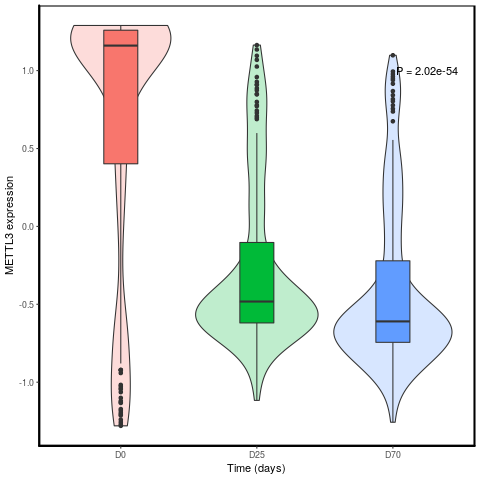

In [286]:
%%R
library(tidyverse)
library(reshape2)
PPI <- scan('../../TARBP2_PPI_ens.list', what=character())
exp <- read_tsv('../RNA-seq_pipeline/exp/featureCounts_pcg_rpm_exp.txt')
colnames(exp) <- c("Ensemble", "D70_r1", "D0_r1", "D25_r2", "D0_r2", "D25_r1", "D70_r2")
exp <- exp %>% select(Ensemble, D0_r1, D0_r2, D25_r1, D25_r2, D70_r1, D70_r2)
exp.t <- as_tibble(t(scale(t(exp[,-1]))))
exp.t <- exp.t %>% mutate(Ensemble=exp$Ensemble)
exp.t <- exp.t %>% select(Ensemble, D0_r1, D0_r2, D25_r1, D25_r2, D70_r1, D70_r2)
#cond <- c("D0","D0","D25", "D25", "D70", "D70")
exp.t <- exp.t %>% filter(Ensemble %in% PPI) %>% select(c(-1))
exp.t <- exp.t %>% mutate(D0=(D0_r1+D0_r2)/2, D25=(D25_r1+D25_r2)/2, D70=(D70_r1+D70_r2)/2) %>% select(D0,D25,D70)
df <- as_tibble(melt(exp.t))
pv <- sprintf("P = %.2e", summary(aov(df$value~df$variable))[[1]][["Pr(>F)"]][[1]])
df %>% ggplot(aes(x=variable, y=value, fill=variable)) + geom_violin(alpha=0.25) + geom_boxplot(width=0.25) + 
scale_x_discrete(limits=c("D0","D25","D70")) +   annotate("text", x=3.25,y=1, label=pv)+xlab("Time (days)")+ylab("METTL3 expression")+
  theme_bw(11) + theme(panel.background = element_rect(colour = "black")) + theme(panel.background = element_rect(size = 1, linetype = "solid", colour = "black"), panel.grid.minor = element_blank(), panel.grid.major = element_blank(), legend.position="none", panel.border = element_blank(),
                                                                                 axis.line.x = element_line(size = 1, linetype = "solid", colour = "black"),
                                                                                axis.line.y = element_line(size = 1, linetype = "solid", colour = "black"))


#ggsave('../RNA-seq_pipeline/exp/featureCounts_pcg_rpm_exp_TARBP2-PPI.pdf', width=1.75, heigh=2.5)